In [1]:
# import required packages for data manupulation

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import os
import random
plt.show()

In [2]:
# INPUT: set path for data placement 
#os.chdir(r'C:\Users\mshafin\Desktop\xavient_churn_project')
#os.chdir(r'C:\Users\mohammad shafin\Desktop\xavient_churn_project')

os.chdir(r'/home/mohnkhan/xavient_binary_balanced')
random.seed(42)
os.getcwd()

'/home/mohnkhan/xavient_binary_unbalanced'

In [3]:
# INPUT: data loaded to a pandas dataframe

df = pd.read_csv('telecom_churn_validation.csv')
df.info()
df_length = df.shape[1]
df_row = df.shape[0]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1409 entries, 0 to 1408
Data columns (total 21 columns):
customerID          1409 non-null object
gender              1409 non-null object
SeniorCitizen       1409 non-null int64
Partner             1409 non-null object
Dependents          1409 non-null object
tenure              1409 non-null int64
PhoneService        1409 non-null object
MultipleLines       1409 non-null object
InternetService     1409 non-null object
OnlineSecurity      1409 non-null object
OnlineBackup        1409 non-null object
DeviceProtection    1409 non-null object
TechSupport         1409 non-null object
StreamingTV         1409 non-null object
StreamingMovies     1409 non-null object
Contract            1409 non-null object
PaperlessBilling    1409 non-null object
PaymentMethod       1409 non-null object
MonthlyCharges      1409 non-null float64
TotalCharges        1406 non-null float64
Churn               1409 non-null object
dtypes: float64(2), int64(2), ob

In [4]:
df_row

1409

Columnwise missing value count


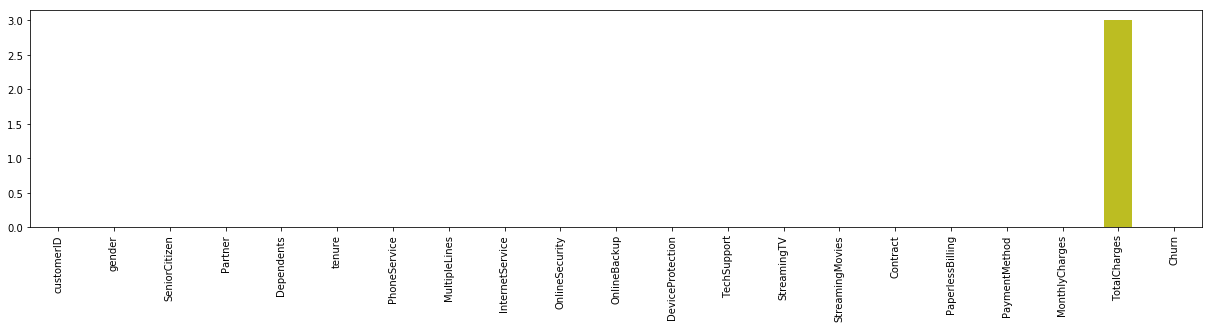

In [5]:
# count number of missing values in each column
# sum True's

print("Columnwise missing value count")
df.isnull().sum().plot.bar(figsize=(df_length, 4))
#df["target"].value_counts().plot.pie(figsize=(4, 4))
#print(df.target.value_counts())

In [6]:
# INPUT: set customer identification code and target variable

customer_identity_code = 'customerID'
target_code = 'Churn'

In [7]:
# set index for customer identification code

df = df.set_index(customer_identity_code)

In [8]:
# REMOVE identify target variable

df['target'] = df[target_code]

In [9]:
# REMOVE INPUT: set target labels

label_target1 = 'Yes'
label_target0 = 'No'

In [10]:
# REMOVE function to recode target levels

def dependent_col(row):
    if row['target'] == label_target1:
        val = 1  # input
    elif row['target'] == label_target0:
        val = 0  # imput
    else:
        val = 2
    return val

In [11]:
# REMOVE view recoded data in the target variable

df['target'] = df.apply(dependent_col, axis=1)
print(df.loc[:,['target','Churn']].head(5)) #check changes in target recoding

            target Churn
customerID              
1488-PBLJN       0    No
2137-DQMEV       0    No
6963-EZQEE       0    No
0909-SELIE       0    No
8344-WFMFH       0    No


In [12]:
# REMOVE keep rows when target variable is finite

start = df.shape[1]
df = df[np.isfinite(df['target'])]
finish = df.shape[1]
print("The number of row/rows dropped because of missing target variable is " + str(start-finish))

The number of row/rows dropped because of missing target variable is 0


In [13]:
# INPUT droping initial target
# when the target variable is identified and recoded it has to be removed by the program

df = df.drop(['Churn'],axis=1)

0    1035
1     374
Name: target, dtype: int64


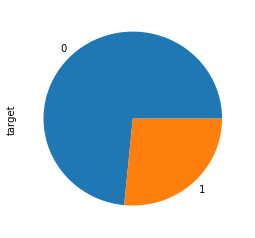

In [14]:
# target variable distibution

df["target"].value_counts().plot.pie(figsize=(4, 4))
print(df.target.value_counts())

In [15]:
# load numeric columns for scoring
import pickle
pickle_in_cat = open("object_columns_final_nz.pickle","rb")
object_columns_final_nz_index = pickle.load(pickle_in_cat)
len(object_columns_final_nz_index)
#df[object_columns_final_nz_index]

14

In [16]:
df[object_columns_final_nz_index].columns

Index(['SeniorCitizen', 'Partner', 'Dependents', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

In [17]:
# INPUT: populate with columns, which is considered discrete or non continious
# all categoies which have string input are categroized as object type in python by default

object_columns = object_columns_final_nz_index

In [18]:
# typecasting 'object' type on variables that may be populated with numbers, but are of non-continious nature such as gender

for column in object_columns:
    df[column] = df[column].astype('object')

Value count of each level for datatype 'object'
SeniorCitizen


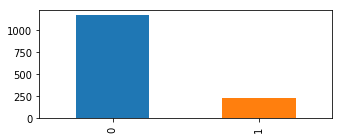

Partner


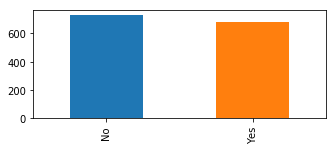

Dependents


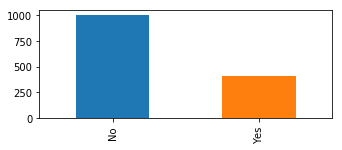

MultipleLines


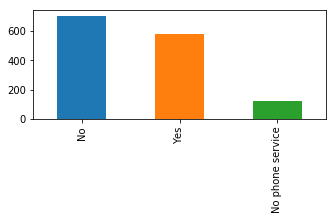

InternetService


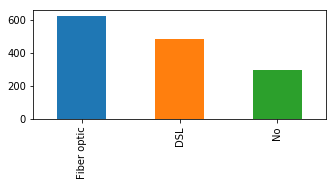

OnlineSecurity


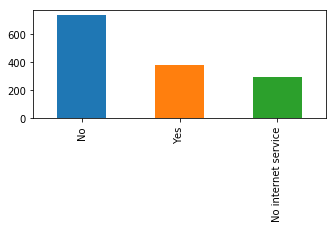

OnlineBackup


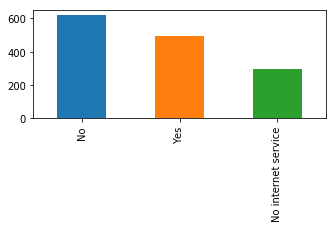

DeviceProtection


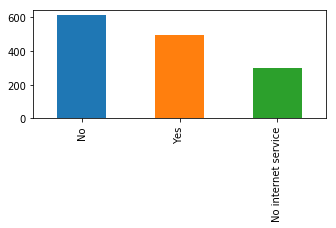

TechSupport


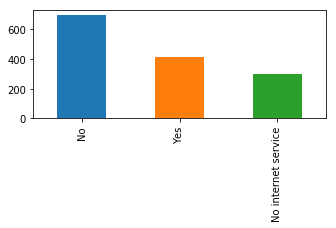

StreamingTV


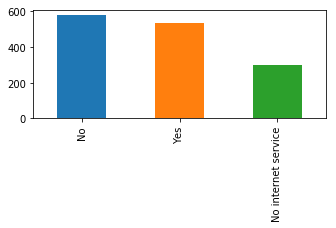

StreamingMovies


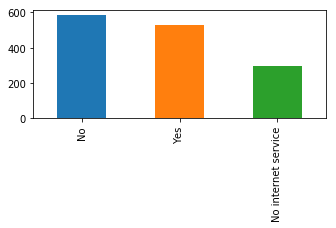

Contract


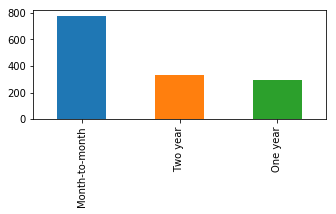

PaperlessBilling


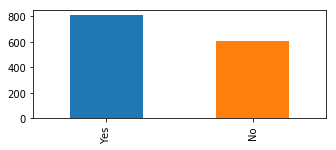

PaymentMethod


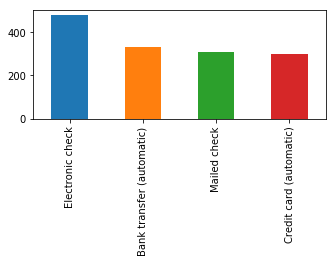

In [19]:
# view levels per columns in the non-continious variable

print("Value count of each level for datatype 'object'")

for column in object_columns:
    print(column)
    df[column].value_counts().plot.bar(figsize=(df_length/4, 2))
    plt.show()

In [20]:
# object variables converted to categories for cat.codes

object_columns = df[object_columns].select_dtypes(['object']).columns

In [21]:
# missing value imputation strategy: create a new level called 'UNKNOWN'

print("The count of columns were successfully imputed with missing value indicator 'UKNOWN'")

for column in object_columns:
    if df[column].dtypes=="object":
        df[column] = df[column].fillna("UKNOWN").astype('object')    

The count of columns were successfully imputed with missing value indicator 'UKNOWN'


In [22]:
# missing value imputation strategy: create a new level called 'UNKNOWN'

for column in object_columns:
    if df[column].dtypes=="object":
        df[column] = df[column].astype('category')

In [23]:
# recoding categories to number with numerical and alphabatical order 0-1 and a-z, respectively

df[object_columns] = df[object_columns].apply(lambda x: x.cat.codes)

In [24]:
# load numeric columns for scoring
import pickle

pickle_in_num = open("scale_columns_final_nz.pickle","rb")
scale_columns_final_nz_index = pickle.load(pickle_in_num)
len(scale_columns_final_nz_index)

3

In [25]:
# INPUT: populate with numeric columns
# missing value treatments

numeric_columns_mean = scale_columns_final_nz_index # impute missing numeric columns with mean

# impute missing numeric columns with zero

numeric_columns_zero = [] # populate with numeric columns

scale_columns = numeric_columns_mean + numeric_columns_zero
length = len(scale_columns) # for figure width

Check for continous variable scaling


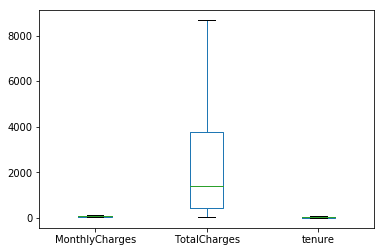

In [26]:
df[scale_columns].plot.box(figsize=(length*2,4))
print("Check for continous variable scaling")

In [27]:
# for mean imputation

for column in numeric_columns_mean:
    if df[column].dtypes in ["int64","float64"] :
        df[column] = df[column].fillna(df[column].mean())

# for 0 imputation

for column in numeric_columns_zero:
    if df[column].dtypes in ["int64","float64"] :
        df[column] = df[column].fillna(0)

# append all numerical columns

scale_columns = numeric_columns_mean + numeric_columns_zero

In [28]:
# scale the numerical variables
from sklearn.preprocessing import scale
for column in scale_columns:
    if df[column].dtypes in ["int64","float64"] :
        df[column] = scale(df[column].astype('float64'))

scaled continious variables


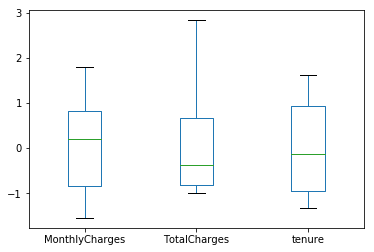

In [29]:
print("scaled continious variables")
df[scale_columns].plot.box(figsize=(length*2,4))

In [30]:
# create features for modeling objective
object_columns = object_columns.tolist()
target_column = ['target']
feature_columns = scale_columns + object_columns
#print("target_column: " + str(target_column))
#print("feature_columns: " + str(feature_columns))
#print("dataframe shape: " + str(df.shape))

In [31]:
X = df[feature_columns].values
y = df[target_column].values.ravel()
X.shape,y.shape

((1409, 17), (1409,))

In [32]:
# import metrics for model evaluation

from sklearn.metrics import recall_score,accuracy_score,confusion_matrix,classification_report,precision_score
from sklearn.metrics import cohen_kappa_score
from sklearn.model_selection import cross_val_score
from keras.wrappers.scikit_learn import KerasClassifier
# create function to evaluate model performance

def evaluate(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    cohen_kappa = cohen_kappa_score(y_test, y_pred, sample_weight=None)
    recall = recall_score(y_test,y_pred)
    matrix = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    report = classification_report(y_test, y_pred)
    print("accuracy :" +str(accuracy))
    print("cohen_kappa :" +str(cohen_kappa))
    print("recall :" +str(recall))
    print(" tn, fp, fn, tp :" )
    print(tn, fp, fn, tp)
    print("matrix :")
    print(matrix)
    print("report :")
    print(report)
    return accuracy

/home/mohnkhan/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [33]:
# import pickle
import pickle
############################# SMOTE
# load the gbm from disk
#gbm_smote = pickle.load(open('finalized_gbm_smote.sav', 'rb'))
#result = gbm_smote.score(X, y)
#print("gbm_smote: " + str(result))
# load the rf from disk
#rf_smote = pickle.load(open('finalized_rf_smote.sav', 'rb'))
#result = rf_smote.score(X, y)
#print("rf_smote: " + str(result))
# load the adaboost from disk
#ada_smote = pickle.load(open('finalized_ada_smote.sav', 'rb'))
#result = ada_smote.score(X, y)
#print("ada_smote" + str(result))
# load the gbm from disk
#gs_smote = pickle.load(open('finalized_xgb_smote.sav', 'rb'))
#result = gs_smote.score(X, y)
#print("xgb_smote: " + str(result))
############################# No SMOTE
# load the gbm from disk
gbm = pickle.load(open('finalized_gbm.sav', 'rb'))
result = gbm.score(X, y)
print("gbm: " + str(result))
# load the rf from disk
rf = pickle.load(open('finalized_rf.sav', 'rb'))
result = rf.score(X, y)
print("rf: " + str(result))
# load the adaboost from disk
ada = pickle.load(open('finalized_ada.sav', 'rb'))
result = ada.score(X, y)
print("ada: " + str(result))
# load the gbm from disk
gs = pickle.load(open('finalized_xgb.sav', 'rb'))
result = gs.score(X, y)
print("xgb: " + str(result))

gbm_smote: 0.7906316536550745
rf_smote: 0.7877927608232789
ada_smote0.7636621717530163
xgb_smote: 0.7885024840312278


/home/mohnkhan/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/mohnkhan/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
/home/mohnkhan/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that a

In [1]:
from keras.models import Sequential
from keras.layers import Dense
from keras.models import model_from_json
from keras.optimizers import SGD
sgd = SGD(lr=0.1, momentum=0.9, decay=0.0, nesterov=False)
# load json and create model
#json_file = open('model_smote_json.json', 'r')
#loaded_model_smote_json = json_file.read()
#json_file.close()
#loaded_model_smote = model_from_json(loaded_model_smote_json)
# load weights into new model
#loaded_model_smote.load_weights("model_smote_json.h5")
#loaded_model_smote.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
#print("Loaded model from disk")

# load json and create model
json_file = open('model_json.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
## load weights into new model
loaded_model.load_weights("model_json.h5")
loaded_model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
print("Loaded model from disk")

/home/mohnkhan/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


FileNotFoundError: [Errno 2] No such file or directory: 'model_json.json'

In [2]:
def evaluate_accuracy(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    return accuracy

def evaluate_kappa(model, X_test, y_test):
    y_pred = model.predict(X_test)
    kappa = cohen_kappa_score(y_test, y_pred, sample_weight=None)
    return kappa

def evaluate_recall(model, X_test, y_test):
    y_pred = model.predict(X_test)
    recall = recall_score(y_test,y_pred)
    return recall

def evaluate_precision(model, X_test, y_test):
    y_pred = model.predict(X_test)
    precision = precision_score(y_test,y_pred)
    return precision

def evaluate_con_mat_row(model, X_test, y_test):
    y_pred = model.predict(X_test)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    return (tn, fp, fn, tp)

################ keras model
def evaluate_accuracy_keras(model, X_test, y_test):
    y_pred = model.predict_classes(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    return accuracy

def evaluate_kappa_keras(model, X_test, y_test):
    y_pred = model.predict_classes(X_test)
    kappa = cohen_kappa_score(y_test, y_pred, sample_weight=None)
    return kappa

def evaluate_recall_keras(model, X_test, y_test):
    y_pred = model.predict_classes(X_test)
    recall = recall_score(y_test,y_pred)
    return recall

def evaluate_precision_keras(model, X_test, y_test):
    y_pred = model.predict_classes(X_test)
    precision = precision_score(y_test,y_pred)
    return precision

def evaluate_con_mat_row_keras(model, X_test, y_test):
    y_pred = model.predict_classes(X_test)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    return (tn, fp, fn, tp) 

In [36]:
#xgbm_smote_accuracy = evaluate_accuracy(gs_smote,X,y)
#gbm_smote_accuracy = evaluate_accuracy(gbm_smote,X,y)
#rf_smote_accuracy = evaluate_accuracy(rf_smote,X,y)
#ada_smote_accuracy = evaluate_accuracy(ada_smote,X,y)
#tf_smote_accuracy = evaluate_accuracy_keras(loaded_model_smote,X,y)
xgbm_accuracy = evaluate_accuracy(gs,X,y)
gbm_accuracy = evaluate_accuracy(gbm,X,y)
rf_accuracy = evaluate_accuracy(rf,X,y)
ada_accuracy = evaluate_accuracy(ada,X,y)    
tf_accuracy = evaluate_accuracy_keras(loaded_model,X,y)

#xgbm_smote_kappa = evaluate_kappa(gs_smote,X,y)
#gbm_smote_kappa = evaluate_kappa(gbm_smote,X,y)
#rf_smote_kappa = evaluate_kappa(rf_smote,X,y)
#ada_smote_kappa = evaluate_kappa(ada_smote,X,y)
#tf_smote_kappa = evaluate_kappa_keras(loaded_model_smote,X,y)
xgbm_kappa = evaluate_kappa(gs,X,y)
gbm_kappa = evaluate_kappa(gbm,X,y)
rf_kappa = evaluate_kappa(rf,X,y)
ada_kappa = evaluate_kappa(ada,X,y)    
tf_kappa = evaluate_kappa_keras(loaded_model,X,y)

#xgbm_smote_recall = evaluate_recall(gs_smote,X,y)
#gbm_smote_recall = evaluate_recall(gbm_smote,X,y)
#rf_smote_recall = evaluate_recall(rf_smote,X,y)
#ada_smote_recall = evaluate_recall(ada_smote,X,y)
#tf_smote_recall = evaluate_recall_keras(loaded_model_smote,X,y)
xgbm_recall = evaluate_recall(gs,X,y)
gbm_recall = evaluate_recall(gbm,X,y)
rf_recall = evaluate_recall(rf,X,y)
ada_recall = evaluate_recall(ada,X,y)
tf_recall = evaluate_recall_keras(loaded_model,X,y)  

#xgbm_smote_precision = evaluate_precision(gs_smote,X,y)
#gbm_smote_precision = evaluate_precision(gbm_smote,X,y)
#rf_smote_precision = evaluate_precision(rf_smote,X,y)
#ada_smote_precision = evaluate_precision(ada_smote,X,y)
#tf_smote_precision = evaluate_precision_keras(loaded_model_smote,X,y)
xgbm_precision = evaluate_precision(gs,X,y)
gbm_precision = evaluate_precision(gbm,X,y)
rf_precision = evaluate_precision(rf,X,y)
ada_precision = evaluate_precision(ada,X,y)
tf_precision = evaluate_precision_keras(loaded_model,X,y) 

#xgbm_smote_tfft = evaluate_con_mat_row(gs_smote,X,y)
#gbm_smote_tfft = evaluate_con_mat_row(gbm_smote,X,y)
#rf_smote_tfft = evaluate_con_mat_row(rf_smote,X,y)
#ada_smote_tfft = evaluate_con_mat_row(ada_smote,X,y)
#tf_smote_tfft = evaluate_con_mat_row_keras(loaded_model_smote,X,y)
xgbm_tfft = evaluate_con_mat_row(gs,X,y)
gbm_tfft = evaluate_con_mat_row(gbm,X,y)
rf_tfft = evaluate_con_mat_row(rf,X,y)
ada_tfft = evaluate_con_mat_row(ada,X,y)
tf_tfft = evaluate_con_mat_row_keras(loaded_model,X,y)

/home/mohnkhan/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/mohnkhan/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/mohnkhan/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/mohnkhan/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty ar

In [37]:
report = [{'model': 'XGBM_smote', 'accuracy': xgbm_smote_accuracy, 'kappa': xgbm_smote_kappa,'recall': xgbm_smote_recall, 'precision': xgbm_smote_precision,'tn, fp, fn, tp': xgbm_smote_tfft},
          {'model': 'GBM_smote', 'accuracy': gbm_smote_accuracy, 'kappa': gbm_smote_kappa,'recall': gbm_smote_recall, 'precision': gbm_smote_precision,'tn, fp, fn, tp': gbm_smote_tfft},
          {'model': 'RF_smote',  'accuracy': rf_smote_accuracy, 'kappa': rf_smote_kappa,'recall': rf_smote_recall, 'precision': rf_smote_precision,'tn, fp, fn, tp': rf_smote_tfft},
          {'model': 'ADA_smote', 'accuracy': ada_smote_accuracy, 'kappa': ada_smote_kappa, 'recall': ada_smote_recall, 'precision': ada_smote_precision ,'tn, fp, fn, tp': ada_smote_tfft },
          {'model': 'tf_smote', 'accuracy': tf_smote_accuracy,  'kappa': tf_smote_kappa,'recall': tf_smote_recall, 'precision': tf_smote_precision ,'tn, fp, fn, tp': tf_smote_tfft }]#,
          #{'model': 'XGBM', 'accuracy': xgbm_accuracy, 'recall': xgbm_recall, 'precision': xgbm_precision,'tn, fp, fn, tp': xgbm_tfft},
          #{'model': 'GBM', 'accuracy': gbm_accuracy, 'recall': gbm_recall, 'precision': gbm_precision, 'tn, fp, fn, tp': gbm_tfft},
          #{'model': 'RF',  'accuracy': rf_accuracy, 'recall': rf_recall, 'precision': rf_precision, 'tn, fp, fn, tp': rf_tfft},
          #{'model': 'ADA', 'accuracy': ada_accuracy,  'recall': ada_recall, 'precision': ada_precision,  'tn, fp, fn, tp': ada_tfft },
          #{'model': 'tf', 'accuracy': tf_accuracy,  'recall': tf_recall, 'precision': tf_precision ,'tn, fp, fn, tp': tf_smote_tfft }]
df1 = pd.DataFrame(report)
df1 = df1[['model', 'accuracy', 'kappa', 'recall', 'precision','tn, fp, fn, tp']]

In [38]:
df1

,model,accuracy,kappa,recall,precision,"tn, fp, fn, tp"
0,XGBM_smote,0.788502,0.501874,0.740642,0.579498,"(834, 201, 97, 277)"
1,GBM_smote,0.790632,0.493790,0.700535,0.588764,"(852, 183, 112, 262)"
2,RF_smote,0.787793,0.467196,0.633690,0.593985,"(873, 162, 137, 237)"
3,ADA_smote,0.763662,0.475066,0.796791,0.536937,"(778, 257, 76, 298)"
4,tf_smote,0.733144,0.410334,0.748663,0.498221,"(753, 282, 94, 280)"


In [39]:
df1 = df1.set_index('model')

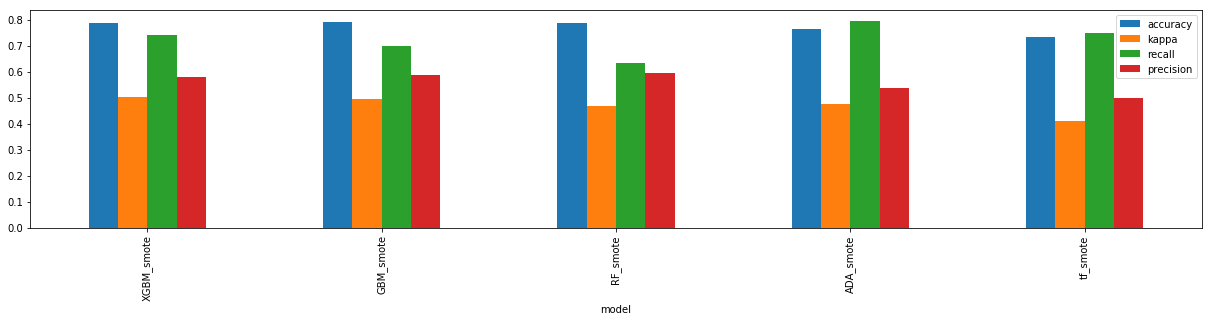

In [40]:
df1.plot.bar(figsize=(df_length, 4))